(number-factors-notebook)=
# Il numero dei fattori 

In [1]:
source("_common.R")
library("psych")


Attaching package: ‘psych’




The following objects are masked from ‘package:scales’:

    alpha, rescale




The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




Sono stati proposti quattro criteri per determinare il numero $m$ di
fattori da estrarre (Rencher, 2002). Tali criteri sono elencati di
seguito.

-   Scegliere $m$ tale per cui la varianza spiegata dal modello
    fattoriale superi una soglia predeterminata, per esempio l'80% della
    varianza totale, $tr(\textbf{S})$ o $tr(\textbf{R})$.
-   Scegliere $m$ uguale al numero di autovalori aventi un valore
    maggiore del valore medio degli autovalori. Per **R** il valore
    medio degli autovalori è $1$; per **S** è $\sum_{j=1}^p \theta_j/p$.
-   Usare lo *scree test*.
-   Valutare l'ipotesi che $m$ sia il numero corretto di fattori,
    $H_0: \boldsymbol{\Sigma} =  \boldsymbol{\Lambda}
      \boldsymbol{\Lambda}^{\mathsf{T}} +  \boldsymbol{\Psi}$,
    dove $\boldsymbol{\Lambda}$ è di ordine $p \times m$.

## Quota di varianza spiegata

Il primo criterio si applica soprattutto al metodo delle componenti
principali. La proporzione della varianza capionaria spiegata dal
fattore $j$-esimo estratto da **S** è uguale a

$$\sum_{i=i}^p \hat{\lambda}_{ij}^2 / tr(\textbf{S}).$$ 

Nel caso in cui
i fattori vengano estratti da **R** avremo

$$\sum_{i=i}^p \hat{\lambda}_{ij}^2 / p.$$

Nel caso di fattori incorrelati, ciascun fattore contribuisce con una
quota complessiva di varianza spiegata pari alla somma dei quadrati
delle saturazioni fattoriali contenute nella matrice
$\hat{\boldsymbol{\Lambda}}$:
$\sum_{i=1}^p\sum_{j=1}^m\hat{\lambda}_{ij}^2$. Nel caso del metodo
delle componenti principali, tale somma è anche uguale alla somma dei
primi $m$ autovalori, o alla somma di tutte le $p$ comunalità:

$$\sum_{i=1}^p\sum_{j=1}^m\hat{\lambda}_{ij}^2= \sum_{i=1}^p \hat{h}_i^2
= \sum_{j=1}^m \theta_j$$

Sulla base di queste considerazioni, il numero $m$ di fattori viene
scelto in modo da spiegare una quota sufficientemente grande di **S** o
$p$.

Il numero dei fattori può essere determinato in questo modo anche nel
caso in cui l'analisi fattoriale venga eseguita con il metodo dei
fattori principali (ovvero, nel caso in cui vengano usate le stime delle
comunalità per generare la matrice ridotta $\textbf{S} -
\hat{\boldsymbol{\Psi}}$ o $\textbf{R} - \hat{\boldsymbol{\Psi}}$). In
questo caso, però, è possibile che alcuni autovalori della matrice
$\textbf{S} - \hat{\boldsymbol{\Psi}}$ o $\textbf{R} -
\hat{\boldsymbol{\Psi}}$ assumano valore negativo. In tali circostanze,
è possibile che la proporzione cumulativa della varianza
$\sum_{j=1}^m \theta_j / \sum_{j=1}^p \theta_j$ assuma un valore
maggiore di $1.0$ per $j < p$.

La proporzione cumulativa della varianza si riduce poi a $1.0$ quando
vengono considerati anche i successivi autovalori negativi. Di
conseguenza, può succedere che, utilizzando la matrice
$\textbf{S} - \hat{\boldsymbol{\Psi}}$ o
$\textbf{R} - \hat{\boldsymbol{\Psi}}$, il criterio definito in base
alla quota della varianza spiegata venga raggiunto per un valore $m$
minore di quello che verrebbe trovato utilizzando la matrice **S** o
**R**.

Nel caso del metodo dei fattori principali iterato, $m$ viene
specificato precedentemente a ciascuna iterazione e $\sum_{i}
\hat{h}^2_i$ viene ottenuto dopo ciascuna iterazione calcolando
$\text{tr}(\textbf{S} - \hat{\boldsymbol{\Psi}})$. Per scegliere $m$,
come per il metodo delle componenti principali, possono essere usati gli
autovalori di **S** o **R**.

## Valore medio degli autovalori

Il calcolo del valore medio degli autovalori è una procedura euristica
implementata in molti software. In una variante di tale metodo, $m$
viene scelto in modo tale da uguagliare il numero degli autovalori
positivi della matrice ridotta $\textbf{R} - \hat{\boldsymbol{\Psi}}$ (in tale matrice vi sono solitamente degli autovalori negativi). Tale variante ha però lo svantaggio di produrre
solitamente un numero di fattori troppo grande.

## Scree test

Lo scree test è basato su una rappresentazione grafica degli autovalori
di **S** o **R**. Si costruisce un grafico che rappresenta gli
autovalori ordinati in maniera decrescente in funzione del numero dei
fattori. I punti che rappresentano gli autovalori vengono collegati con
una spezzata. Il valore $m$ viene determinato in corrispondenza di quel
fattore oltre il quale il dislivello tra fattori successivi diventa
esiguo e la spezzata tende a diventare orizzontale.

## Parallel analysis

La Parallel Analysis è un metodo alternativo allo scree test[^1]. Nella
Parallel Analysis, il criterio usato per decidere il numero di fattori
da estrarre viene determinato dal confronto con la media degli
autovalori generati da un campione casuale di variabili standardizzate.
Tale confronto ha lo scopo di controllare le variazioni dovute agli
errori di campionamento. Anche se, nel caso di variabili incorrelate,
tutti gli autovalori di una matrice di correlazione dovrebbero avere un
valore pari a uno, come conseguenza della variabilità campionaria in
qualunque campione finito vi sono comunque uno o più autovalori empirici
maggiori di uno.

Tale fatto può essere illustrato mediante la seguente
simulazione di Monte Carlo. Si consideri una matrice di correlazione
calcolata su $p=10$ variabili casuali mutuamente indipendenti, ciascuna
costituita da $n=20$ osservazioni.

In [2]:
n <- 20
nsim <- 1000
e1 <- rep(0, nsim)
for (i in 1:nsim) {
  Y <- cbind(
    rnorm(n), rnorm(n), rnorm(n), rnorm(n), rnorm(n),
    rnorm(n), rnorm(n), rnorm(n), rnorm(n), rnorm(n)
  )
  e <- eigen(cor(Y))
  e1[i] <- e$values[1]
}
max(e1)

[1] 3.332866

Per i dati di questa simulazione, l'autovalore maggiore ha un valore
pari a $3.53$, anche se i dati sono del tutto casuali. La Parallel
Analysis tiene conto di questo fatto e determina $m$ confrontando gli
autovalori empirici con le loro "controparti casuali." Vanno a
determinare $m$ solo gli autovalori empirici che hanno un valore
superiore ai corrispondenti autovalori generati da una matrice di dati
dello stesso ordine composta da colonne mutualmente incorrelate. Nel
caso dell'esempio presente, per esempio, l'autovalore maggiore dovrà
avere un valore maggiore di $3.53$ (anziché di $1.00$ o del punto di
flesso della spezzata dello scree test).

## Test di bontà di adattamento

Se si assume la normalità distributiva dei dati è possibile valutare la
bontà di adattamento attraverso il test del rapporto di verosimiglianze.
L'ipotesi nulla postula che la matrice di covarianza delle $Y$ abbia la
forma specificata dal modello fattoriale, ossia

$$H_0: \boldsymbol{\Sigma} =  \boldsymbol{\Lambda}
  \boldsymbol{\Lambda}^{\mathsf{T}} +  \boldsymbol{\Psi},$$
  
ovvero che $m$ fattori comuni siano sufficienti per spiegare la
struttura di interdipendenza della variabile casuale $Y$ oggetto di
osservazione campionaria. L'alternativa è che $m$ fattori comuni non
siano sufficienti a tale spiegazione

$$H_1: \boldsymbol{\Sigma} \neq  \boldsymbol{\Lambda}
  \boldsymbol{\Lambda}^{\mathsf{T}} +  \boldsymbol{\Psi},$$
  
dove $\boldsymbol{\Lambda}$ è di ordine $p \times m$. Se l'ipotesi nulla
non viene rifiutata vuol dire che il modello fornisce un buon
adattamento ai dati.

Sotto l'ipotesi nulla, il test ha una distribuzione asintotica, per
$n \rightarrow \infty$, di tipo chi quadrato con gradi di libertà pari
a: 

$$\nu=\frac{1}{2}\left[ (p-m)^2 - (p - m) \right].$$ 

Tale risultato di natura asintotica, valido per $n$ grande, può essere migliorato, per
ottenere una approssimazione migliore, sostituendo $\nu$ con:

$$\nu^* = n - 2 - \frac{2p-1}{6}-\frac{2}{3}m.$$ 

Il rifiuto di $H_0$ implica che $m$ è troppo piccolo e un numero maggiore di fattori è
necessario. Solitamente si inizia l'analisi considerando un numero di
fattori molto piccolo: $m^*=1$ e si prende come ipotesi per il test che
il numero di fattori sia $m^*$. Se l'ipotesi nulla è accettata il
procedimento si arresta, altrimenti si passa a considerare $m^* + 1$
fattori e si prosegue con lo stesso ragionamento. Il procedimento si
arresta non appena si verifica una delle seguenti situazioni: è stata
accettata l'ipotesi $H_0$ per un certo valore di $m$, oppure,
$\nu=\frac{1}{2}\left[ (p-m)^2 - (p - m) \right]=0$, ossia la variabile
$\chi^2$ dovrebbe avere zero gradi di libertà, che non è possibile.

Per poter applicare il test che determina il buon grado di adattamento
del modello fattoriale occorre che i gradi di libertà della statistica
del chi-quadrato siano positivi. Questo sta a significare che il numero
di fattori comuni non può superare il più grande numero intero che
soddisfa la seguente equazione:

$$m < \frac{1}{2} \left( 2p+1-\sqrt{8p+1} \right)$$ 

per un numero fissato $p$ di variabili manifeste. In pratica, quando $n$ è grande, il
test basato sul rapporto di verosimiglianze rivela un numero di fattori
maggiore degli altri metodi descritti in precedenza. Alcuni considerano
dunque il valore $m$ indicato dal test quale limite superiore del numero
dei fattori che rivestono una qualche importanza pratica.

Per alcuni campioni di dati, la scelta di $m$ non è ovvia. Questa
indeterminazione costituisce un limite dell'analisi fattoriale.
Solitamente, si procede con utilizzando un certo metodo per la scelta di
$m$ (diciamo lo scree test) e valuta la proporzione di varianza spiegata
di ciascun item e, dopo un'appropriata rotazione, l'interpretabilità
della soluzione ottenuta. Se le comunalità o l'interpretabilità dei
fattori non sembrano adeguati, si procede con un numero maggiore di
fattori. Tale procedura è certamente soggettiva e i limiti della
soluzione che viene ottenuta sono evidenti.

Per altri campioni di dati, la scelta di $m$ consente una maggiore
certezza. Questo avviene quando tutti i metodi che abbiamo descritto
prima forniscono la stessa risposta. In questi casi, possiamo essere più
certi della soluzione dell'analisi fattoriale.

**Esempio.** Per confrontare i quattro metodi discussi per la scelta del numero $m$
di fattori usiamo qui una matrice di correlazioni calcolata sulla WAIS. Le 11 sottoscale sono le seguenti:

- X1 = Information
- X2 = Comprehension
- X3 = Arithmetic
- X4 = Similarities
- X5 = Digit.span
- X6 = Vocabulary
- X7 = Digit.symbol
- X8 = Picture.completion
- X9 = Block.design
- X10 = Picture.arrangement
- X11 = Object.assembly

In [3]:
varnames <- c("IN", "CO", "AR", "SI", "DS", "VO", "SY", "PC", 
              "BD", "PA", "OA", "AG", "ED")
temp <- matrix(c(
	1,0.67,0.62,0.66,0.47,0.81,0.47,0.60,0.49,0.51,0.41,
	-0.07,0.66,.67,1,0.54,0.60,0.39,0.72,0.40,0.54,0.45,
	0.49,0.38,-0.08,0.52,.62,.54,1,0.51,0.51,0.58,0.41,
	0.46,0.48,0.43,0.37,-0.08,0.49,.66,.60,.51,1,0.41,
	0.68,0.49,0.56,0.50,0.50,0.41,-0.19,0.55,.47,.39,.51,
	.41,1,0.45,0.45,0.42,0.39,0.42,0.31,-0.19,0.43,
	.81,.72,.58,.68,.45,1,0.49,0.57,0.46,0.52,0.40,-0.02,
	0.62,.47,.40,.41,.49,.45,.49,1,0.50,0.50,0.52,0.46,
	-0.46,0.57,.60,.54,.46,.56,.42,.57,.50,1,0.61,0.59,
	0.51,-0.28,0.48,.49,.45,.48,.50,.39,.46,.50,.61,1,
	0.54,0.59,-0.32,0.44,.51,.49,.43,.50,.42,.52,.52,.59,
	.54,1,0.46,-0.37,0.49,.41,.38,.37,.41,.31,.40,.46,.51,
	.59,.46,1,-0.28,0.40,-.07,-.08,-.08,-.19,-.19,-.02,
	-.46,-.28,-.32,-.37,-.28,1,-0.29,.66,.52,.49,.55,.43,
	.62,.57,.48,.44,.49,.40,-.29,1
), nrow=13, ncol=13, byrow=TRUE)

colnames(temp) <- varnames
rownames(temp) <- varnames

wais_cor <- temp[1:11, 1:11]
wais_cor

,IN,CO,AR,SI,DS,VO,SY,PC,BD,PA,OA
IN,1.00,0.67,0.62,0.66,0.47,0.81,0.47,0.60,0.49,0.51,0.41
CO,0.67,1.00,0.54,0.60,0.39,0.72,0.40,0.54,0.45,0.49,0.38
AR,0.62,0.54,1.00,0.51,0.51,0.58,0.41,0.46,0.48,0.43,0.37
SI,0.66,0.60,0.51,1.00,0.41,0.68,0.49,0.56,0.50,0.50,0.41
DS,0.47,0.39,0.51,0.41,1.00,0.45,0.45,0.42,0.39,0.42,0.31
VO,0.81,0.72,0.58,0.68,0.45,1.00,0.49,0.57,0.46,0.52,0.40
SY,0.47,0.40,0.41,0.49,0.45,0.49,1.00,0.50,0.50,0.52,0.46
PC,0.60,0.54,0.46,0.56,0.42,0.57,0.50,1.00,0.61,0.59,0.51
BD,0.49,0.45,0.48,0.50,0.39,0.46,0.50,0.61,1.00,0.54,0.59
PA,0.51,0.49,0.43,0.50,0.42,0.52,0.52,0.59,0.54,1.00,0.46


Il primo metodo per la determinazione di $m$ richiede di estrarre tanti
fattori quanti sono necessari per spiegare una quota predeterminata
della varianza totale. Supponiamo di porre il criterio pari all'80%
della varianza totale. La soluzione ottenuta in questo modo ci
porterebbe a mantenere $m=5$ fattori:

In [4]:
out <- eigen(wais_cor)
sum(out$val[1:4]) / sum(out$val)
sum(out$val[1:5]) / sum(out$val)

[1] 0.7656781

[1] 0.8118853

Il secondo metodo suggerisce di mantenere tutti gli autovalori superiori
al valore medio degli autovalori (che, nel caso di **R** è uguale a
$1$). Nel caso presente, $m=2$:

In [5]:
round(out$values, 3)

[1] 6.074 1.015 0.746 0.587 0.508 0.431 0.423 0.377 0.351 0.310 0.177

Il terzo metodo, lo scree test, può essere eseguito usando la funzione
`VSS.scree()` contenuta nel pacchetto `psych`.

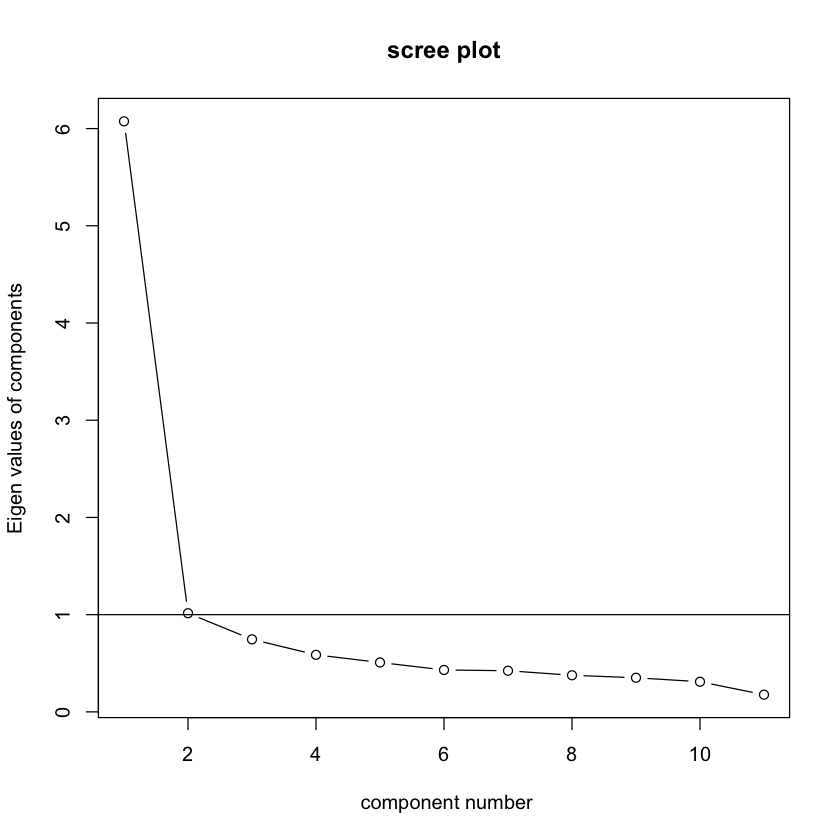

In [6]:
VSS.scree(wais_cor)

Lo scree test suggerisce una soluzione a $m=1$ fattori, come indicato
nella figura precedente. Il terzo metodo, nella versione della Parallel
Analysis, può essere eseguito usando la funzione `paran()` contenuta nel
pacchetto `paran`. La Parallel Analysis indica una soluzione a $m=1$
fattore.

Loading required package: MASS




Attaching package: ‘MASS’




The following object is masked from ‘package:patchwork’:

    area




The following object is masked from ‘package:dplyr’:

    select





Using eigendecomposition of correlation matrix.
Computing: 10%  20%  30%  40%  50%  60%  70%  80%  90%  100%


Results of Horn's Parallel Analysis for component retention
330 iterations, using the mean estimate

-------------------------------------------------- 
Component   Adjusted    Unadjusted    Estimated 
            Eigenvalue  Eigenvalue    Bias 
-------------------------------------------------- 
1           1.636878    3.765744      2.128865
-------------------------------------------------- 

Adjusted eigenvalues > 1 indicate dimensions to retain.
(1 components retained)



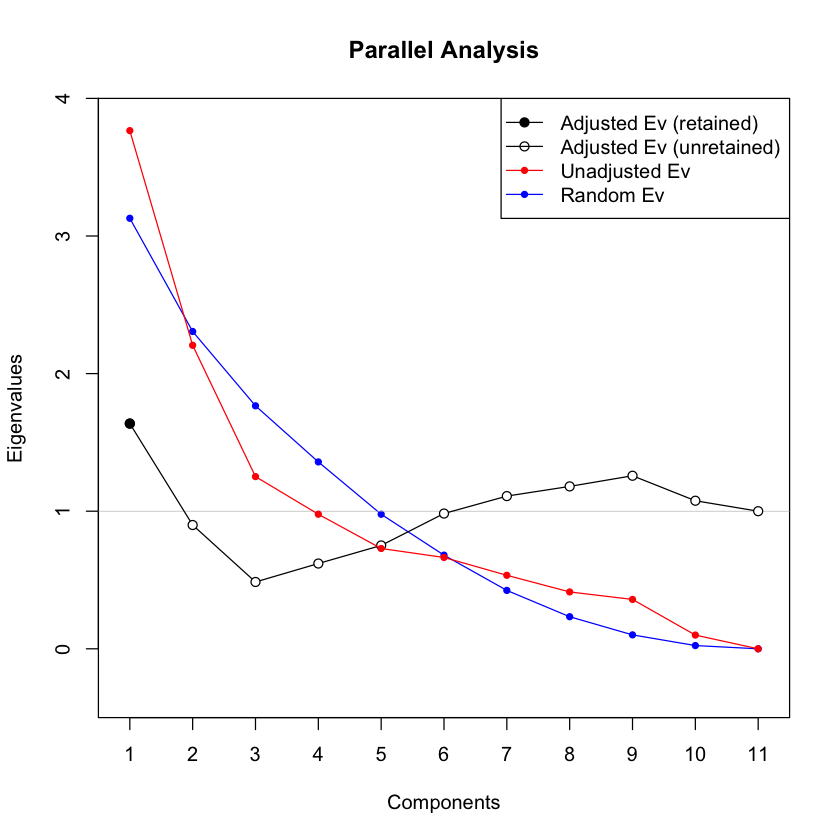

In [7]:
library("paran")
paran(wais_cor, graph = TRUE)

Il quarto metodo consiste nell'applicazione di un test inferenziale
relativo al numero di fattori. Anche questo metodo indica una soluzione
a sei fattori:

In [8]:
factanal(covmat=wais_cor, factors=5, n.obs=933)


Call:
factanal(factors = 5, covmat = wais_cor, n.obs = 933)

Uniquenesses:
   IN    CO    AR    SI    DS    VO    SY    PC    BD    PA    OA 
0.235 0.389 0.117 0.419 0.600 0.109 0.277 0.308 0.334 0.472 0.456 

Loadings:
   Factor1 Factor2 Factor3 Factor4 Factor5
IN  0.745   0.264   0.301   0.192   0.118 
CO  0.667   0.278   0.244   0.129   0.111 
AR  0.378   0.236   0.814   0.145         
SI  0.591   0.332   0.207   0.252   0.121 
DS  0.288   0.208   0.366   0.341   0.155 
VO  0.865   0.216   0.207   0.229         
SY  0.251   0.364   0.153   0.708         
PC  0.425   0.548   0.156   0.216   0.375 
BD  0.246   0.708   0.230   0.201   0.107 
PA  0.355   0.457   0.163   0.325   0.245 
OA  0.211   0.664   0.128   0.205         

               Factor1 Factor2 Factor3 Factor4 Factor5
SS loadings      2.799   1.986   1.176   1.043   0.280
Proportion Var   0.254   0.181   0.107   0.095   0.025
Cumulative Var   0.254   0.435   0.542   0.637   0.662

Test of the hypothesis that 5 factors are

Le differenze tra i risultati ottenuti con i quattro metodi descritti
sopra suggeriscono la presenza di una componente di arbitrarietà nella
scelta della soluzione da adottare. 
:::
